In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    roc_curve
)

In [46]:
train_df = pd.read_csv(r'C:\Users\ixz407\OneDrive - University of Birmingham\Dissertation\Machine Learning\Dissertation\Tables\bnpl_train.csv')
test_df = pd.read_csv(r'C:\Users\ixz407\OneDrive - University of Birmingham\Dissertation\Machine Learning\Dissertation\Tables\bnpl_test.csv')
val_df = pd.read_csv(r'C:\Users\ixz407\OneDrive - University of Birmingham\Dissertation\Machine Learning\Dissertation\Tables\bnpl_val.csv')
target_col = "default_flag"

In [47]:
print(train_df.shape, test_df.shape, val_df.shape)
print(train_df.head(), test_df.head(), val_df.head())
print("Train nulls in target:", train_df["default_flag"].isna().sum())
print("Train class distribution:\n", train_df["default_flag"].value_counts(normalize=True))

(595, 16) (199, 16) (199, 16)
   failed_traditional_credit  external_repayment_loans  \
0                          1                         1   
1                          0                         0   
2                          0                         0   
3                          0                         0   
4                          0                         1   

   credit_card_interest_incidence  default_flag  bnpl_usage_frequency  \
0                               0             0             -0.730258   
1                               0             0              1.319109   
2                               0             0              0.408279   
3                               1             0             -1.641088   
4                               1             0              0.408279   

   financial_stress_score  credit_limit_utilisation  \
0               -1.246089                 -1.746734   
1                0.529472                 -0.222965   
2                

In [48]:
X_train = train_df.drop(columns=[target_col])
y_train = train_df[target_col]
print("X_train shape:", X_train.shape, X_train.head())
print("y_train shape:", y_train.shape, y_train.head())



X_train shape: (595, 15)    failed_traditional_credit  external_repayment_loans  \
0                          1                         1   
1                          0                         0   
2                          0                         0   
3                          0                         0   
4                          0                         1   

   credit_card_interest_incidence  bnpl_usage_frequency  \
0                               0             -0.730258   
1                               0              1.319109   
2                               0              0.408279   
3                               1             -1.641088   
4                               1              0.408279   

   financial_stress_score  credit_limit_utilisation  \
0               -1.246089                 -1.746734   
1                0.529472                 -0.222965   
2                1.239697                  0.805578   
3                1.594809                 -0.184871

In [49]:
X_test = test_df.drop(columns=[target_col])
y_test = test_df[target_col]
print("X_test shape:", X_test.shape, X_test.head())
print("y_test shape:", y_test.shape, y_test.head())

X_test shape: (199, 15)    failed_traditional_credit  external_repayment_loans  \
0                          0                         0   
1                          0                         0   
2                          1                         1   
3                          0                         0   
4                          0                         0   

   credit_card_interest_incidence  bnpl_usage_frequency  \
0                               0              0.180572   
1                               1             -1.413380   
2                               0              1.546817   
3                               0             -1.413380   
4                               0             -0.047135   

   financial_stress_score  credit_limit_utilisation  \
0               -0.890977                  0.005600   
1                1.594809                  1.643651   
2                0.174360                 -1.670546   
3               -0.180752                 -1.327698 

In [50]:
X_val = val_df.drop(columns=[target_col])
y_val = val_df[target_col]
print("X_val shape:", X_val.shape, X_val.head())
print("y_val shape:", y_val.shape, y_val.head())

X_val shape: (199, 15)    failed_traditional_credit  external_repayment_loans  \
0                          0                         0   
1                          0                         0   
2                          0                         0   
3                          0                         1   
4                          0                         0   

   credit_card_interest_incidence  bnpl_usage_frequency  \
0                               1             -0.502550   
1                               0              0.408279   
2                               0              0.635987   
3                               0             -0.730258   
4                               1              0.635987   

   financial_stress_score  credit_limit_utilisation  \
0                1.239697                  0.272259   
1               -0.535864                 -1.670546   
2               -0.890977                  0.043694   
3                0.884585                 -0.108683  

In [51]:
# 4. Peek at feature names and target distribution
print("Features:", X_train.columns.tolist())
print("Train target balance:\n", y_train.value_counts(normalize=True))

Features: ['failed_traditional_credit', 'external_repayment_loans', 'credit_card_interest_incidence', 'bnpl_usage_frequency', 'financial_stress_score', 'credit_limit_utilisation', 'payment_delinquency_count', 'impulsive_buying_score', 'financial_literacy_assessment', 'debt_accumulation_metric', 'return_dispute_incidents', 'demographic_risk_factor', 'bnpl_debt_ratio', 'stress_usage_interaction', 'adjusted_debt_interaction']
Train target balance:
 default_flag
0    0.922689
1    0.077311
Name: proportion, dtype: float64


Baseline Model

Validation metrics:
   accuracy: 0.8844
  precision: 0.4054
     recall: 0.9375
   f1_score: 0.5660
    roc_auc: 0.9631

Confusion matrix:
[[161  22]
 [  1  15]]

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       183
           1       0.41      0.94      0.57        16

    accuracy                           0.88       199
   macro avg       0.70      0.91      0.75       199
weighted avg       0.95      0.88      0.90       199



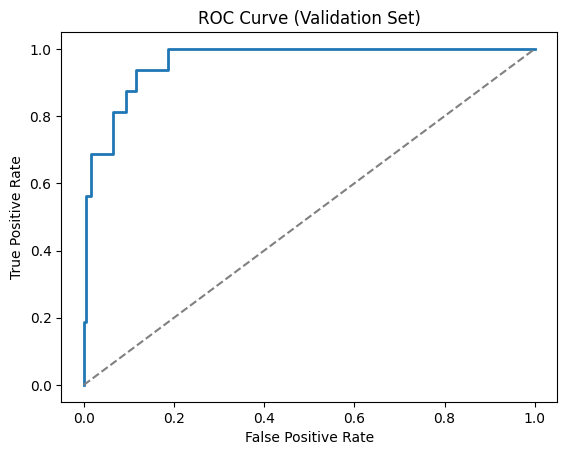

In [68]:
baseline_model = LogisticRegression(random_state=42, max_iter=1000)
baseline_model.fit(X_train, y_train)


y_val_pred   = baseline_model.predict(X_val)
y_val_proba  = baseline_model.predict_proba(X_val)[:, 1]

# 3. Compute the core metrics
baseline_metrics = {
    "accuracy":  accuracy_score(y_val, y_val_pred),
    "precision": precision_score(y_val, y_val_pred),
    "recall":    recall_score(y_val, y_val_pred),
    "f1_score":  f1_score(y_val, y_val_pred),
    "roc_auc":   roc_auc_score(y_val, y_val_proba)
}
print("Validation metrics:")
for name, val in baseline_metrics.items():
    print(f"  {name:>9}: {val:.4f}")

# 4. Confusion matrix
baseline_cm = confusion_matrix(y_val, y_val_pred)
plt.savefig(r'C:\Users\ixz407\OneDrive - University of Birmingham\Dissertation\Machine Learning\Dissertation\Plots\baseline_roc_curve.png')


Balanced Model

Validation metrics:
   accuracy: 0.8844
  precision: 0.4054
     recall: 0.9375
   f1_score: 0.5660
    roc_auc: 0.9631

Confusion matrix:
[[161  22]
 [  1  15]]

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       183
           1       0.41      0.94      0.57        16

    accuracy                           0.88       199
   macro avg       0.70      0.91      0.75       199
weighted avg       0.95      0.88      0.90       199



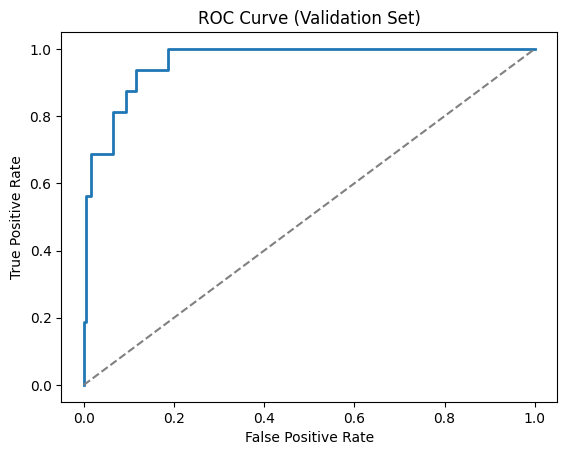

In [69]:
# OPTION A: automatic balancing
balanced_model = LogisticRegression(
    class_weight="balanced",
    random_state=42,
    max_iter=1000
)
balanced_model.fit(X_train, y_train)
# 3. Compute the core metrics
balanced_metrics = {
    "accuracy":  accuracy_score(y_val, y_val_pred),
    "precision": precision_score(y_val, y_val_pred),
    "recall":    recall_score(y_val, y_val_pred),
    "f1_score":  f1_score(y_val, y_val_pred),
    "roc_auc":   roc_auc_score(y_val, y_val_proba)
}
print("Validation metrics:")
for name, val in balanced_metrics.items():
    print(f"  {name:>9}: {val:.4f}")

# 4. Confusion matrix
balanced_cm = confusion_matrix(y_val, y_val_pred)
print("\nConfusion matrix:")
print(balanced_cm)
# Optionally, a prettier display using classification_report:
print("\nClassification report:")
print(classification_report(y_val, y_val_pred))

# 5. Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
plt.figure()
plt.plot(fpr, tpr, lw=2)
plt.plot([0, 1], [0, 1], ls="--", color="grey")  # diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Validation Set)")
plt.savefig(r"C:\Users\ixz407\OneDrive - University of Birmingham\Dissertation\Machine Learning\Dissertation\Plots\balanced_roc_curve.png")
plt.show()

In [70]:
probs_baseline = baseline_model.predict_proba(X_val)[:,1]
probs_balanced = balanced_model.predict_proba(X_val)[:,1]

print(probs_baseline[:10])
print(probs_balanced[:10])

[8.36127723e-04 6.93245605e-02 5.97066805e-05 5.28470385e-03
 8.46015387e-03 1.19935449e-03 2.95192115e-04 4.27295757e-04
 1.37601292e-02 9.77617812e-02]
[0.00408222 0.44695862 0.00202327 0.02086436 0.03548102 0.00307637
 0.00099803 0.00140346 0.17769579 0.48597127]


Threshold Tuning

In [75]:
proba_array = balanced_model.predict_proba(X_val)
probs = proba_array[:, 1]
print("First 10 default‐probabilities:", np.round(probs[:10], 3))
print("Range of probs:  min =", probs.min(), " max =", probs.max())

First 10 default‐probabilities: [0.004 0.447 0.002 0.021 0.035 0.003 0.001 0.001 0.178 0.486]
Range of probs:  min = 8.780550077309836e-06  max = 0.9974735618196658


In [79]:
# 2.1 Compute arrays of precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_val, probs)

# 2.2 Inspect their lengths
print("Precision array length:", len(precision))
print("Recall    array length:", len(recall))
print("Thresholds array length:", len(thresholds))


# 2.3 Peek at the first few entries
for i in range(5):
    print(f"thr={thresholds[i]:.3f} → precision={precision[i]:.3f}, recall={recall[i]:.3f}")

Precision array length: 200
Recall    array length: 200
Thresholds array length: 199
thr=0.000 → precision=0.080, recall=1.000
thr=0.000 → precision=0.081, recall=1.000
thr=0.000 → precision=0.081, recall=1.000
thr=0.000 → precision=0.082, recall=1.000
thr=0.000 → precision=0.082, recall=1.000


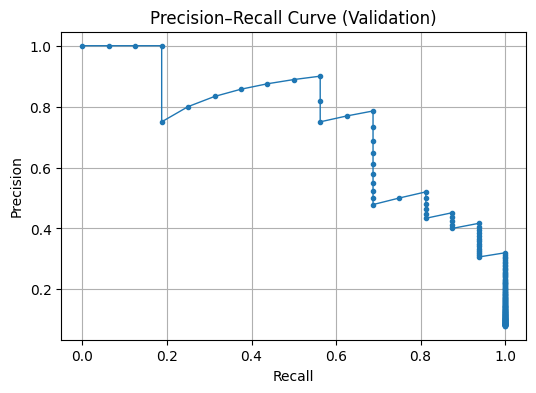

In [81]:

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.', linewidth=1)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve (Validation)")
plt.grid(True)
plt.savefig(r"C:\Users\ixz407\OneDrive - University of Birmingham\Dissertation\Machine Learning\Dissertation\Plots\precision_recall_curve_validation.png")
plt.show()

In [83]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# 4.1 Find the threshold for recall ≥ 0.80
idx = np.where(recall >= 0.80)[0][0]
opt_thresh = thresholds[idx]
print(f"Chosen threshold = {opt_thresh:.3f} → precision={precision[idx]:.3f}, recall={recall[idx]:.3f}")

# 4.2 Apply it
y_pred_adj = (probs >= opt_thresh).astype(int)

# 4.3 Re-evaluate
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_adj))
print("\nClassification Report:\n", classification_report(y_val, y_pred_adj))


Chosen threshold = 0.000 → precision=0.080, recall=1.000
Confusion Matrix:
 [[  0 183]
 [  0  16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       183
           1       0.08      1.00      0.15        16

    accuracy                           0.08       199
   macro avg       0.04      0.50      0.07       199
weighted avg       0.01      0.08      0.01       199



C:\Users\ixz407\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\ixz407\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\ixz407\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_c

In [85]:

target_recall = 0.80

# 1. Find all indices where recall ≥ target
valid_idxs = np.where(recall >= target_recall)[0]

# 2. Pick the **last** one
idx = valid_idxs[-1]  
opt_thresh = thresholds[idx]
print(f"Chosen threshold = {opt_thresh:.3f}  → precision={precision[idx]:.3f}, recall={recall[idx]:.3f}")

# 3. Apply it
y_pred_adj = (probs >= opt_thresh).astype(int)

# 4. Re-evaluate
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_adj))
print("\nClassification Report:\n", classification_report(y_val, y_pred_adj))


Chosen threshold = 0.729  → precision=0.520, recall=0.812
Confusion Matrix:
 [[171  12]
 [  3  13]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.96       183
           1       0.52      0.81      0.63        16

    accuracy                           0.92       199
   macro avg       0.75      0.87      0.80       199
weighted avg       0.95      0.92      0.93       199



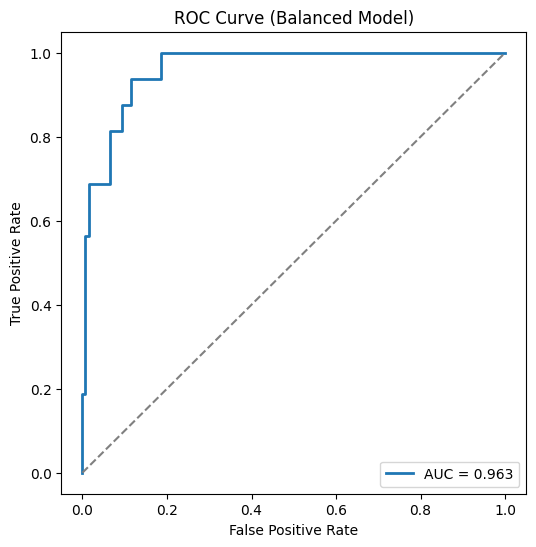

ROC-AUC:  0.9631147540983607

Confusion Matrix at thresh = 0.729:
 [[171  12]
 [  3  13]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.96       183
           1       0.52      0.81      0.63        16

    accuracy                           0.92       199
   macro avg       0.75      0.87      0.80       199
weighted avg       0.95      0.92      0.93       199


Summary metrics at thresh = 0.729:
   accuracy: 0.925
  precision: 0.520
     recall: 0.812
   f1_score: 0.634


In [87]:

# --- ROC Curve & AUC ---
fpr, tpr, roc_th = roc_curve(y_val, probs)
auc = roc_auc_score(y_val, probs)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, lw=2, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], ls="--", color="grey")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Balanced Model)")
plt.legend(loc="lower right")
plt.savefig(r"C:\Users\ixz407\OneDrive - University of Birmingham\Dissertation\Machine Learning\Dissertation\Plots\roc_curve_balanced_final.png")
plt.show()

print("ROC-AUC: ", auc)

# --- Metrics at tuned threshold ---
opt_thresh = 0.729
y_pred_tuned = (probs >= opt_thresh).astype(int)

cm = confusion_matrix(y_val, y_pred_tuned)
print("\nConfusion Matrix at thresh = %.3f:\n" % opt_thresh, cm)

print("\nClassification Report:")
print(classification_report(y_val, y_pred_tuned))

# Also print accuracy, precision, recall, f1 in one place
metrics = {
    "accuracy":  accuracy_score(y_val, y_pred_tuned),
    "precision": precision_score(y_val, y_pred_tuned),
    "recall":    recall_score(y_val, y_pred_tuned),
    "f1_score":  f1_score(y_val, y_pred_tuned),
}
print("\nSummary metrics at thresh = %.3f:" % opt_thresh)
for k, v in metrics.items():
    print(f"  {k:>9}: {v:.3f}")
